# 120年のオリンピックをPandasで振り返る

120olympic_prepare　の続きです。分析編。
<br>
<br>




![Olympic logos](./data/raw/logos.png)


<br>
<br>



# 5 データ分析：いくつかの準備


<すでに完了したこと>
- 欠損値処理
- データフレームの結合



## 5-1 必要なパッケージのインポート

In [790]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

#Matplotlib for Japanese and Jupyter notebook inline 
font = {"family":"Noto Sans CJK JP"}
matplotlib.rc('font', **font)
%matplotlib inline

sns.set(font=["Noto Sans CJK JP"])

In [799]:
# ピックルファイル読み込み
df = pd.read_pickle('./data/processed/df.pkl')



## 5-2 夏季オリンピックに限定したデータセット作成

今回は夏季オリンピックのデータに限定します。

In [800]:
# メダルのダミー変数
tmp = pd.get_dummies(df['Medal'])

# メダルのダミー変数を結合
df = pd.concat([df,tmp],axis=1)

#メダル総数カラム追加
df['MedalSum'] = df['Silver'] + df['Bronze'] + df['Gold']

In [802]:
# 夏季オリンピックのデータフレーム作成
sub_df_tmp  = df.query('Season == "Summer"')
sub_df = sub_df_tmp.copy()

# 6 データ分析

## 6-1 オリンピック全体の歴史

## 6-2 オリンピック参加国の分析
### 6-2-1 やっぱりアメリカ？メダル量産国はどこですか？
### 6-2-2 主要国（G7+中国）のメダル獲得状況は？日本は結構上位なんですか？
### 6-2-3 参加してるけど、まだメダル取ったことない国ってありますか？
### 6-2-4 やっぱりホスト国は、モチベーション高いですよね？勝率高いですか？


## 6-3 オリンピック選手たちの分析
### 6-3-1 選手たちの寿命は？２０歳前後が活躍してそうですけど、どうですか？
### 6-3-2 中年男性や中年女性でも獲得できるメダルはありますか？
### 6-3-3 マイケル・フェルプスだっけ？たくさんメダル獲得している人いますよね？
### 6-3-4 何度も何度もオリンピックに出てる人たちっていますよね？
### 6-3-5 何歳から参加できるんですか？逆に、何歳まで可能性あるんですか？
### 6-3-6 やっぱりオリンピックって人生に1度しか出れない人が多いんですか？

## 6-4 オリンピック競技の分析
### 6-4-1 最近、野球なくなりましたよね？競技って増えてるんですか？減ってるんですか？
### 6-4-2 参加国が少ない、狙い目の競技ってありますか？
### 6-4-3 日本が参加してない競技ってあるんですか？
### 6-4-4 全ての国が参加してる大人気競技ってあるんですか？
### 6-4-5 例えば柔道って、重ければ勝てるんですか？体重と身長が関係しそうな競技ってどれですか？

## 6-5 日本のオリンピックの歴史
### 6-5-1 日本っていつから参加してるんですか？
### 6-5-2 選手団って聞くけど、毎回何人くらいいるんですか？
### 6-5-3 柔道が強い？毎回メダル取ってる種目ってなんですか？
### 6-5-4 何度出てもメダルが取れない競技ってなんですか？

### 6-1-1 参加国の推移
夏季オリンピックの参加国の推移

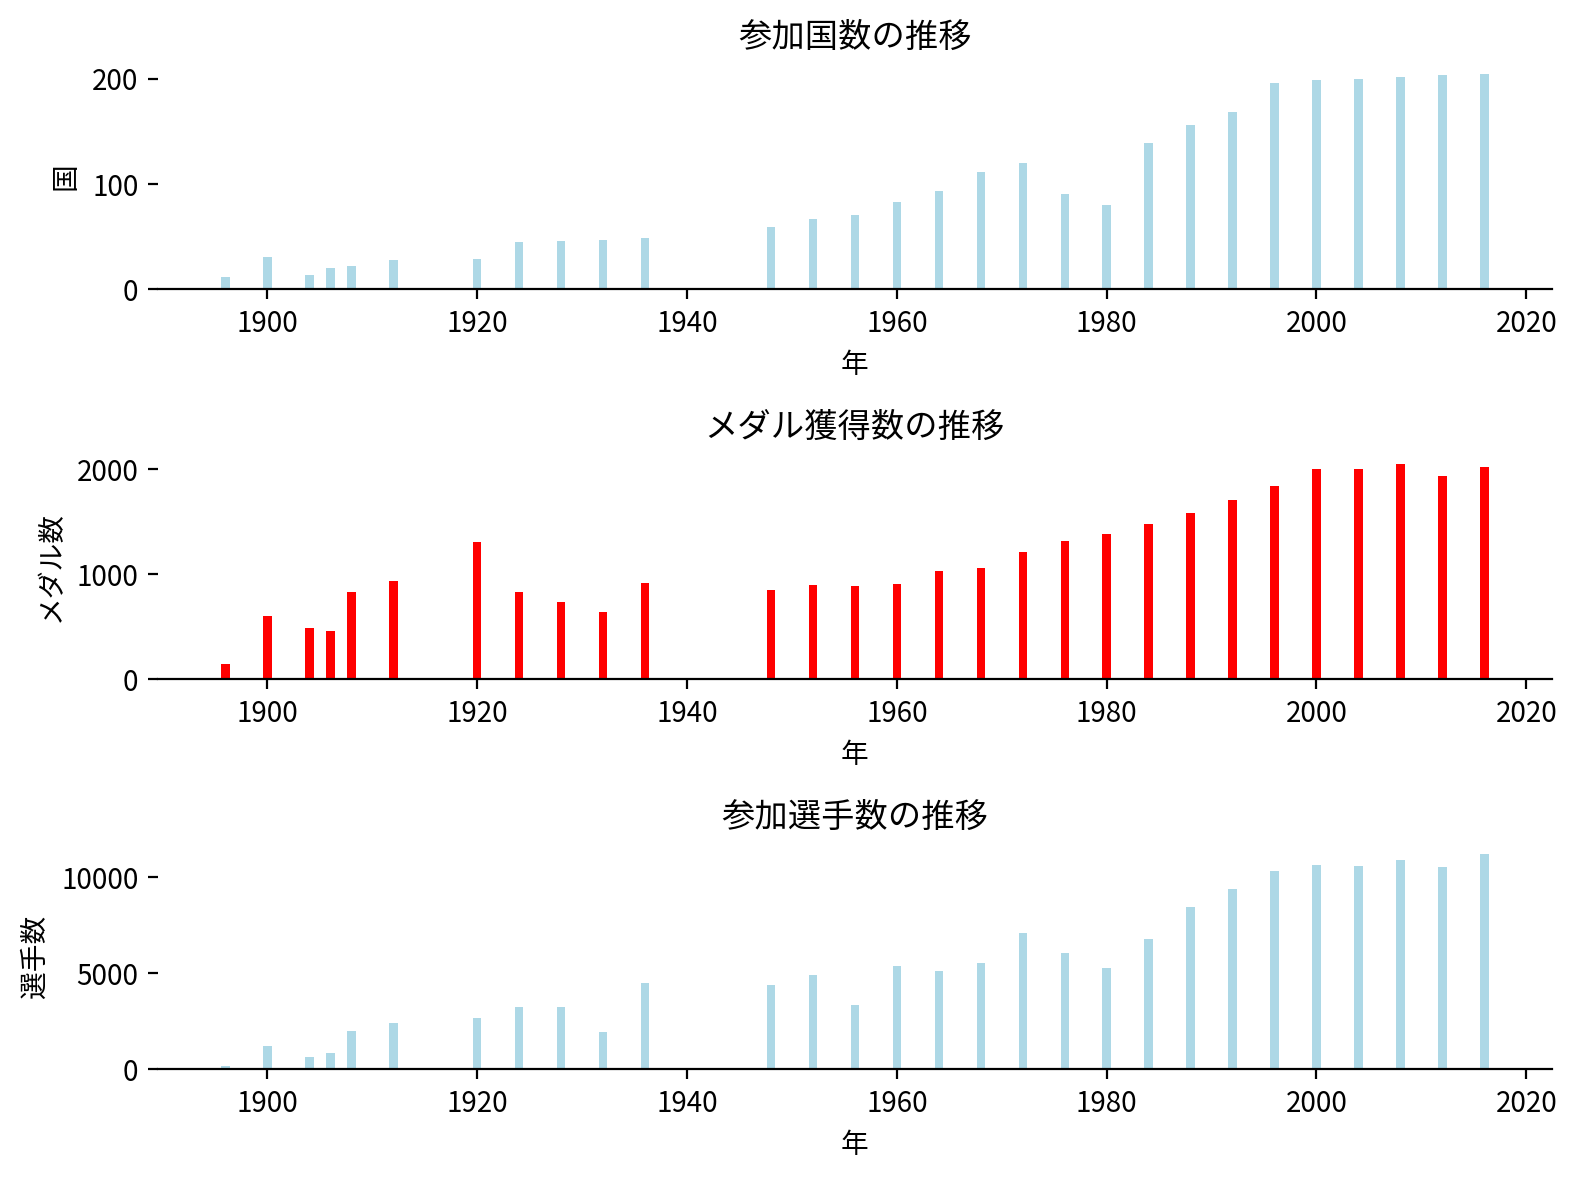

In [621]:

###### 参加国の推移 ######


# 1. データの準備
## ax1 = 参加国
x = sub_df.groupby('Year').nunique().index
y = sub_df.groupby('Year').nunique()['region']

# 2. Figureインスタンス生成 
fig = plt.figure(figsize=(8,6),dpi=200,facecolor="white", edgecolor="white", linewidth=2) 

# 3. Axes　インスタンス生成
ax = fig.add_subplot(3,1,1)

# 4. データを渡してプロット 
ax.bar(x,y,color='lightblue',align='center') #棒グラフ
#ax.plot(x,y) 線グラフ ,   ax.barh(x,)横持ち帽グラフ


# 5. グラフタイトルと軸の調整
ax.set_title('参加国数の推移')
ax.set_xlabel('年')
ax.set_ylabel('国')
ax.set_facecolor((1,1,1,0))


###### メダル獲得数の推移 ######


# 1. データの準備
## ax = 2 発行されたメダル数
x2 = sub_df.groupby('Year').nunique().index
y2 = sub_df.groupby('Year').sum()['MedalSum']

# 2. Figureインスタンス生成 
## 共通のため不要


# 3. Axes　インスタンス生成
ax2 = fig.add_subplot(3,1,2)


# 4. データを渡してプロット 
ax2.bar(x2,y2,color='red',align='center') #棒グラフ


# 5. グラフタイトルと軸の調整
ax2.set_title('メダル獲得数の推移')
ax2.set_xlabel('年')
ax2.set_ylabel('メダル数')
ax2.set_facecolor((1,1,1,0))


###### 参加選手数の推移 ######


# 1. データの準備
## ax = 3 参加した選手の数
x3 = sub_df.groupby('Year').nunique().index
y3 = sub_df.groupby('Year').nunique()['ID']


# 2. Figureインスタンス生成 
## 共通のため不要


# 3. Axes　インスタンス生成
ax3 = fig.add_subplot(3,1,3)


# 4. データを渡してプロット 
ax3.bar(x3,y3,color='lightblue',align='center') #棒グラフ


# 5. グラフタイトルと軸の調整
ax3.set_title('参加選手数の推移')
ax3.set_xlabel('年')
ax3.set_ylabel('選手数')
ax3.set_facecolor((1,1,1,0))


###### 共通項目 ######

##四方の枠(spines)を消す 
sides = ['left','right','top'] 
[ax.spines[side].set_visible(False) for side in sides] 
[ax2.spines[side].set_visible(False) for side in sides] 
[ax3.spines[side].set_visible(False) for side in sides] 

fig.tight_layout()
plt.show()

### 6-1-2  発行されたメダル数の推移


## 6-2 オリンピック参加国の分析



### 6-2-1 やっぱりアメリカ？メダル量産国はどこですか？



In [170]:
region_medal = sub_df.groupby('region').sum()['MedalSum'].sort_values(ascending=False).reset_index()
region_medal.sort_values('MedalSum',inplace=True)


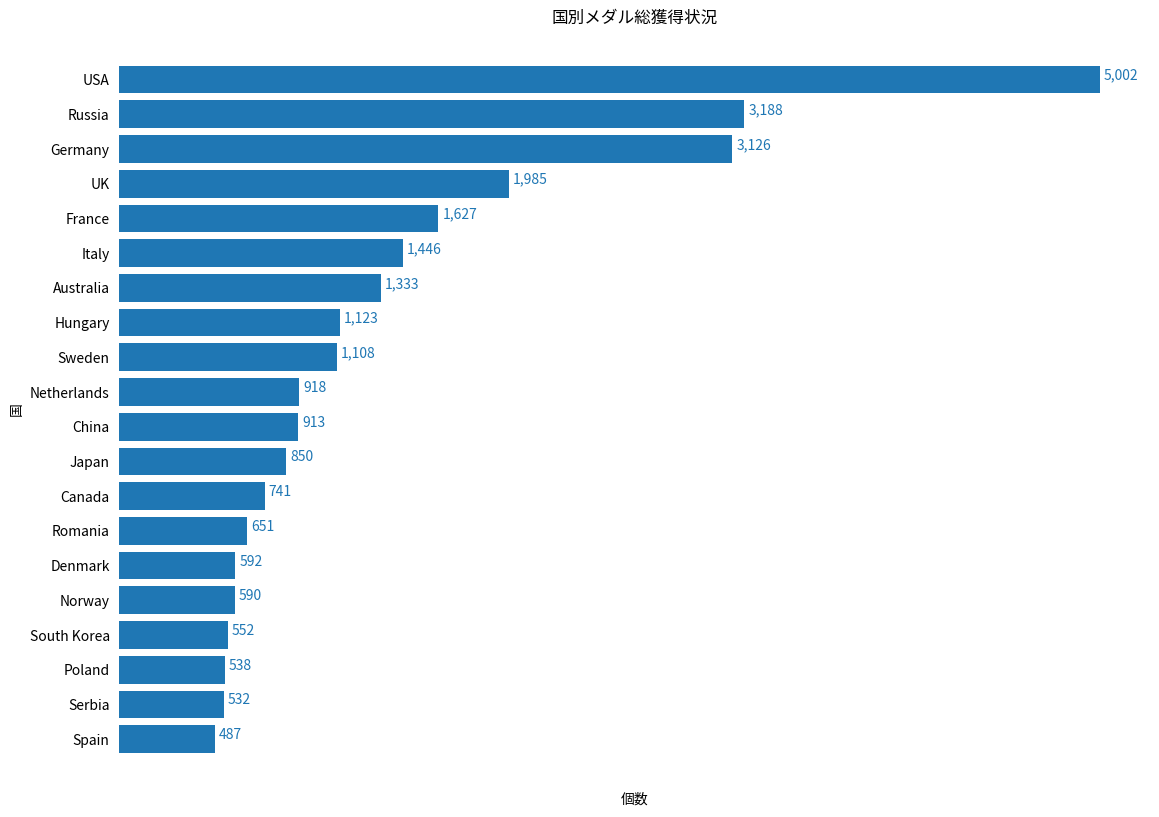

In [210]:


# 1. データ準備
x = region_medal.region.tail(20)
y = region_medal.MedalSum.tail(20)

# 2. Figureインスタンス生成 
fig = plt.figure(figsize=(11.69,8.27),dpi=100,facecolor="white", edgecolor="white", linewidth=2) 

# 3. Axes　インスタンス生成
ax = fig.add_subplot(1,1,1)

# 4. データを渡してプロット 
ax.barh(x,y,color='C0') #棒グラフ
#ax.plot(x,y) 線グラフ ,   ax.barh(x,)横持ち帽グラフ


# 5. グラフタイトルと軸の調整

## y軸 x軸の枠を消す場合
ax.tick_params(bottom=False,left=False,labelbottom=False) 

##四方の枠(spines)を消す 1
sides = ['left','right','top','bottom'] 
[ax.spines[side].set_visible(False) for side in sides] 

ax.set_title('国別メダル総獲得状況')
ax.set_xlabel('個数')
ax.set_ylabel('国')
ax.set_facecolor((1,1,1,0))

## データラベルを表示
for i, value in enumerate(region_medal.tail(20)['MedalSum']):
    ax.text(value+20,i,f'{value:,.0f}',color='C0')
    
    
fig.tight_layout()
plt.show()

In [305]:
print('-'*50)
s = sub_df['MedalSum'].sum()
s1 = sub_df.query('NOC == "USA"')['MedalSum'].sum()
s2 = region_medal.MedalSum.tail(20).sum()
print('120年間のメダル総数:',f'{s:,}')
print('アメリカのメダル総数:',f'{s1:,}:','メダル占有率:',f'{s1/s:.2%}')
print('メダル獲得上位20カ国ののメダル総数:',f'{s2:,.0f}:','メダル占有率:',f'{s2/s:.2%}')
print('-'*50)




--------------------------------------------------
120年間のメダル総数: 34,088
アメリカのメダル総数: 5,002: メダル占有率: 14.67%
メダル獲得上位20カ国ののメダル総数: 27,302: メダル占有率: 80.09%
--------------------------------------------------


### INSIGHT

- 120年間で人類が獲得したメダル総数は3.4万個。そのうち**アメリカだけで15%程度**を占めています。また、参加約200カ国のうち上位10%にあたる20カ国でメダル総数の80%以上を獲得しています。
- 上位20カ国のうち、南半球の国はオーストラリアだけです。
- ノーマークだったのはセルビア。

### INSIGHT (セルビア観察)

Water Polo（水球）やバスケット、フットボール、ハンドボールなどに強い模様。チーム戦に強い？てか、チーム戦の場合はメダル数が多いのか！

In [622]:
serbia_df = sub_df.query('region == "Serbia"')
serbia_df.groupby('Sport').sum().sort_values('MedalSum',ascending=False)[['Bronze','Silver','Gold','MedalSum']].head(5)

,Bronze,Silver,Gold,MedalSum
Sport,,,,
Water Polo,39.0,51.0,50.0,140.0
Basketball,36.0,72.0,12.0,120.0
Football,17.0,40.0,16.0,73.0
Handball,15.0,14.0,43.0,72.0
Volleyball,12.0,12.0,11.0,35.0


### 6-2-2 主要国（G7+中国）のメダル獲得状況は？日本は結構上位なんですか？

G7: Group of Seven の略で、フランス、アメリカ、イギリス、ドイツ、日本、イタリア、カナダの7つの先進国  

In [330]:
g7 = ['USA','France','UK','Germany','Japan','Italy','Canada','China']
g7_sum = sub_df.query('region == @g7').sum()['MedalSum']
print('G7+中国のメダル総数:',f'{g7_sum:,}')



G7+中国のメダル総数: 15,690


In [ ]:
# 1. データの準備
## ax1 = 参加国
x = sub_df.groupby('Year').nunique().index
y = sub_df.groupby('Year').nunique()['region']

# 2. Figureインスタンス生成 
fig = plt.figure(figsize=(8,6),dpi=200,facecolor="white", edgecolor="white", linewidth=2) 

# 3. Axes　インスタンス生成
ax = fig.add_subplot(3,1,1)

# 4. データを渡してプロット 
ax.bar(x,y,color='lightblue',align='center') #棒グラフ
#ax.plot(x,y) 線グラフ ,   ax.barh(x,)横持ち帽グラフ


# 5. グラフタイトルと軸の調整
ax.set_title('参加国数の推移')
ax.set_xlabel('年')
ax.set_ylabel('国')
ax.set_facecolor((1,1,1,0))



In [392]:
g7_df = sub_df.groupby(['region','Year']).sum()
g7_df.query('region == "USA"').reset_index()['Year']


,region,Year,ID,Age,Height,Weight,Bronze,Gold,No Medal,Silver,MedalSum
0,USA,1896,1399849,623.000000,4878.437532,2054.541251,2.0,11.0,7.0,7.0,20.0
1,USA,1900,8913294,3327.587469,24416.743947,10359.095713,17.0,30.0,72.0,16.0,63.0
2,USA,1904,78833109,29675.940853,195372.054311,81588.454428,125.0,128.0,715.0,141.0,394.0
3,USA,1906,5393044,2018.000000,14673.366256,5968.593005,6.0,12.0,57.0,6.0,24.0
4,USA,1908,13108535,5769.354244,39379.359816,16958.179998,15.0,34.0,154.0,16.0,65.0
5,USA,1912,23371716,10233.686275,65338.875738,27934.738786,36.0,46.0,257.0,25.0,107.0
6,USA,1920,32211877,12849.827243,84048.141915,36213.158396,38.0,111.0,279.0,45.0,194.0
7,USA,1924,31608810,12243.687068,80969.710501,33735.378461,49.0,97.0,277.0,36.0,182.0
8,USA,1928,26579131,12734.934319,75503.877820,30823.962252,17.0,47.0,338.0,24.0,88.0
9,USA,1932,45902367,27037.064613,131003.073979,54047.270653,61.0,81.0,554.0,47.0,189.0


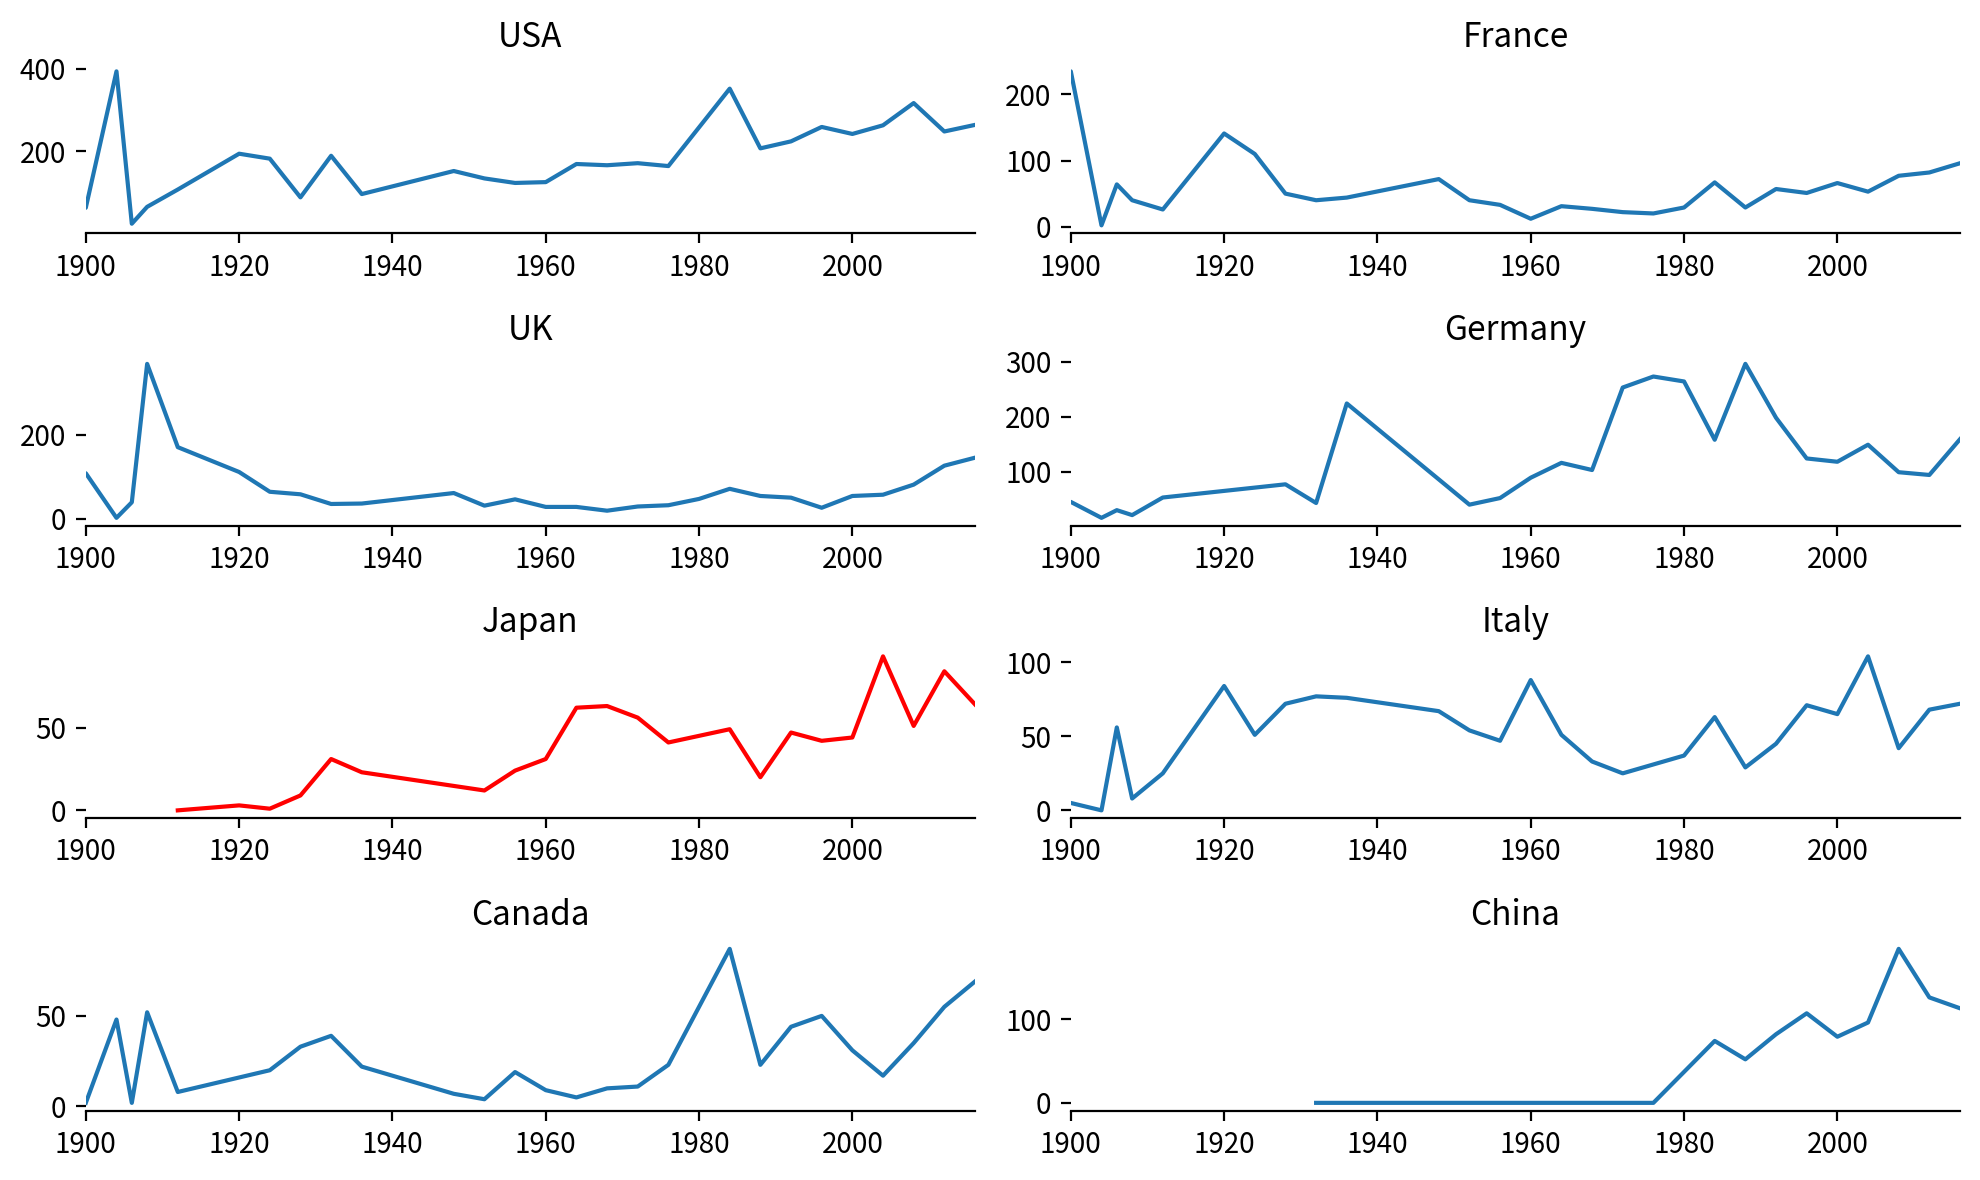

In [482]:
fig = plt.figure(figsize=(10,6),dpi=200,facecolor="white", edgecolor="white", linewidth=2) 
ax=[]
sides = ['left','right','top'] 


for i,region in enumerate(g7):
    ax.append(fig.add_subplot(4,2,i+1))
    if region == 'Japan':
        ax[i].plot(g7_df.query('region == @region').reset_index()\
              ['Year'],g7_df.query('region == @region')["MedalSum"],color='red')
        ax[i].set_xlim(1900,2016)
        [ax[i].spines[side].set_visible(False) for side in sides] 
        ax[i].set_title(region)
    else:
        ax[i].plot(g7_df.query('region == @region').reset_index()\
              ['Year'],g7_df.query('region == @region')["MedalSum"])
        ax[i].set_xlim(1900,2016)
        [ax[i].spines[side].set_visible(False) for side in sides] 
        ax[i].set_title(region)





fig.tight_layout()
plt.show()


### INSIGHT
- G7＋中国の8カ国はメダル獲得上位20カ国に含まれています。オリンピックは先進国が活躍しやすい祭典ですね。
- G7＋中国の8カ国の中では、日本は7位です。頑張れー。
- 中国は1970年あたりから急激に活躍し始めました




### 6-2-3 参加してるけど、まだメダル取ったことない国ってありますか？



In [367]:
nomedal_df = sub_df.groupby('region').sum()

print('メダル未獲得国リスト:\n',nomedal_df.query('MedalSum == 0').index)
print('-'*50)
print('メダル未獲得国数：',nomedal_df.query('MedalSum == 0').index.nunique())
print('-'*50)



メダル未獲得国リスト:
 Index(['Albania', 'American Samoa', 'Andorra', 'Angola', 'Antigua', 'Aruba',
       'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Boliva',
       'Bosnia and Herzegovina', 'Brunei', 'Burkina Faso', 'Cambodia',
       'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Comoros', 'Cook Islands', 'Democratic Republic of the Congo',
       'Dominica', 'El Salvador', 'Equatorial Guinea', 'Gambia', 'Guam',
       'Guinea', 'Guinea-Bissau', 'Honduras', 'Kiribati', 'Laos', 'Lesotho',
       'Liberia', 'Libya', 'Liechtenstein', 'Madagascar', 'Malawi', 'Maldives',
       'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Micronesia',
       'Myanmar', 'Nauru', 'Nepal', 'Nicaragua', 'Oman', 'Palau', 'Palestine',
       'Papua New Guinea', 'Republic of Congo', 'Rwanda', 'Saint Kitts',
       'Saint Lucia', 'Saint Vincent', 'Samoa', 'San Marino',
       'Sao Tome and Principe', 'Seychelles', 'Sierra Leone',
       'Solomon Islands', 'Somalia', 'South Sudan', 'Swa

### INSIGHT
- メダル未獲得の国数は71カ国と、全参加国（region）206カ国の34%を占める。2020東京で初メダル獲得が叶うといいですね。

### 6-2-4 やっぱりホスト国は、モチベーション高いですよね？勝率高いですか？

#### 6-2-4-1 データ前処理：
結果データには都市名しかありませんが、都市名と国をマッピングしたCSVを発見しました。利用させていただきます。  
[Olympic Host Cities](https://www.kaggle.com/jonscheaffer/olympic-host-cities)

■注意点:結果データ（df）とOlympic Host Citiesを結合させるときの注意点
- 一見すると同じように見える単語でもROMAとROMEで若干違ったので、`merge`時はキーチェック
- 単純に都市名だけで`merge`すると複数年開催された都市（London）の場合、複数マージされてしまい合計行数が増えてしまった。キーは都市名と年度を合わせてキーとする必要がありました。


#### どのようにホスト国を分析したらいいのでしょうか？

- ホスト国は参加選手数が多いなら、メダル絶対数も多い？（開催国優遇がある？）
- 開催年と前後開催年の獲得メダル数を比較？


In [578]:
cities = pd.read_csv('./data/raw/olym.csv')

In [595]:
set(df['City'])^set(cities['City'])

set()

In [580]:
# 結果データの都市名リスト化
df_city = list(set(df['City'])-set(cities['City']))
cities_city = list(set(cities['City'])-set(df['City']))

# アルファベット順にしておく
df_city.sort()
cities_city.sort()

# 2つのリストから辞書作成
rename_city = dict(zip(cities_city,df_city))

# 都市名の統一化
cities.replace(rename_city,inplace=True)

In [581]:
# 都市名の差分があるか再チェック
set(df['City'])^set(cities['City'])

set()

In [582]:
# 不要な列名削除、列名微調整、都市名で結合して、最後に夏季五輪だけ抽出！
cities.drop(['Summer','Winter'],axis=1,inplace=True)
cities.rename(columns={'NOC':'NOC_host'},inplace=True)
df_withcity = pd.merge(df,cities,on=['City','Year'],how='left')
sub_df_withcity = df_withcity.query('Season == "Summer"')


In [597]:
sub_df_withcity
# メダルのダミー変数
tmp = pd.get_dummies(sub_df_withcity['Medal'])

# メダルのダミー変数を結合
sub_df_withcity = pd.concat([sub_df_withcity,tmp],axis=1)

#メダル総数カラム追加
sub_df_withcity['MedalSum'] = sub_df_withcity['Silver'] + sub_df_withcity['Bronze'] + sub_df_withcity['Gold']

In [755]:
sub_df_home = pd.DataFrame(columns=['Year','MedalSum','NOC','Home_stats'])
host_list = list(sub_df_withcity.NOC_host.unique())
host_list.remove('RUS') # RUS=ロシアは、ロシアになってからは夏季五輪を開催していないので削除

for i in host_list:
    tmp= sub_df_withcity.query('NOC == @i').groupby('Year').sum().reset_index()[['Year','MedalSum']]
    tmp['NOC'] = i
    tmp['Home_stats'] = sub_df_withcity.query('NOC_host == @i & NOC == @i').groupby('Year')\
                        .sum().reset_index()['MedalSum'].mean()
    sub_df_home = pd.concat([sub_df_home,tmp])

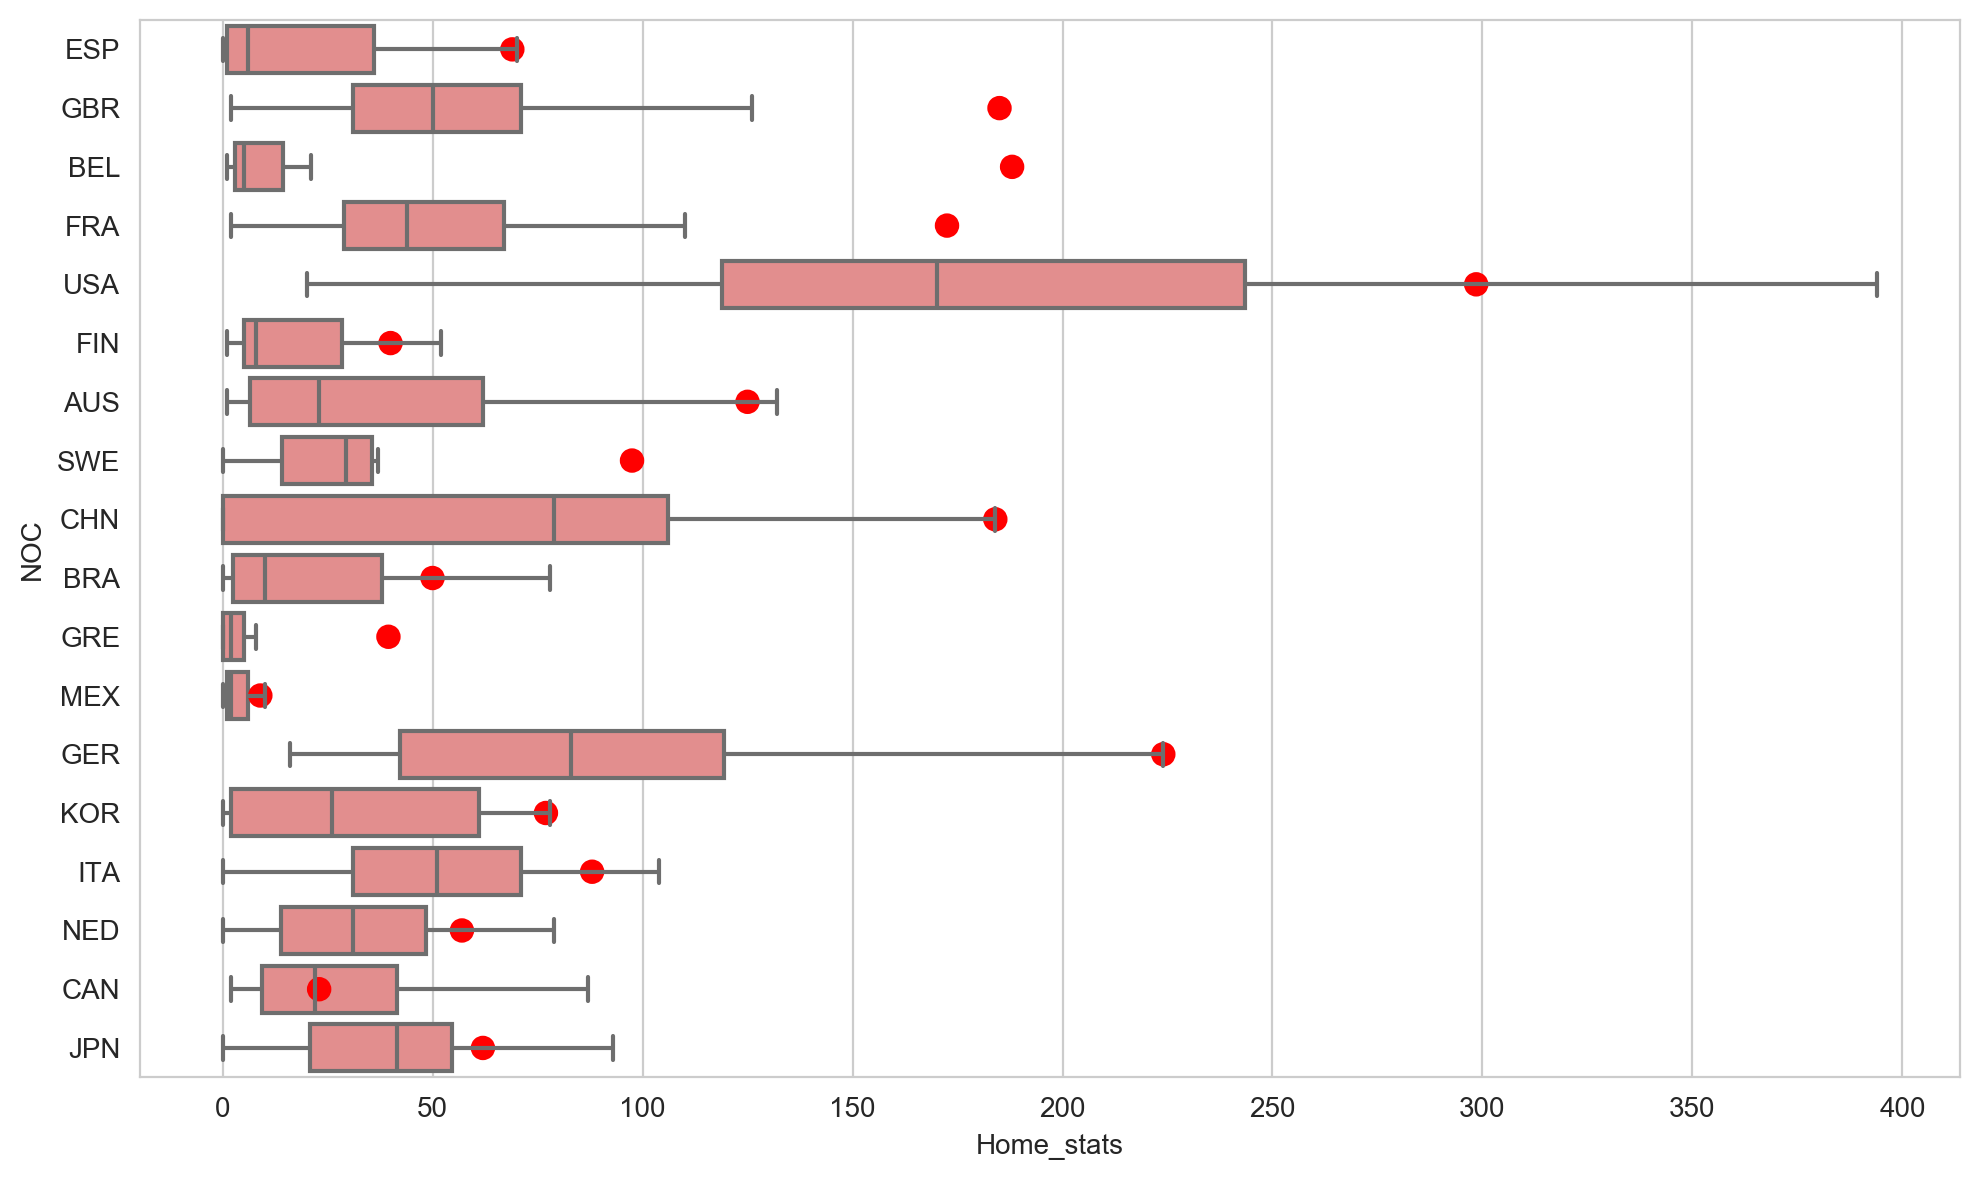

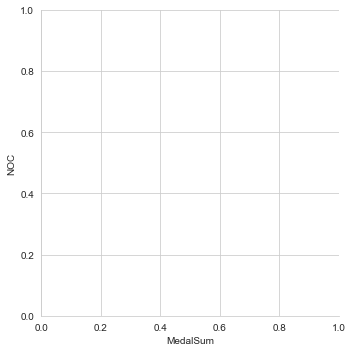

In [756]:

sns.set_style("whitegrid")

#fig, ax = plt.subplots(figsize=(8, 3))

fig = plt.figure(figsize=(10,6),dpi=200,facecolor="white", edgecolor="white", linewidth=2) 
ax = fig.add_subplot(1,1,1)

sns.catplot(x='MedalSum',y='NOC',kind='box',color='lightcoral',\
                 data=sub_df_home,showfliers=False,orient='h',ax=ax)

sns.pointplot(x='Home_stats',y='NOC',data=sub_df_home,color='red',markers='o',fontsize=10,join=False,ax=ax)


fig.tight_layout()
plt.show()



### INSIGHT

- 赤い点が自国開催時のメダル獲得数。ボックスプロットは他国開催時のメダル獲得数。
- どの国も、他国開催時より自国開催時のほうが良い結果を残している。

## 6-3 オリンピック選手たちの分析

次は、各国の選手にフォーカスしてみます。
### 6-3-1 選手たちの寿命は？２０歳前後が活躍してそうですけど、どうですか？



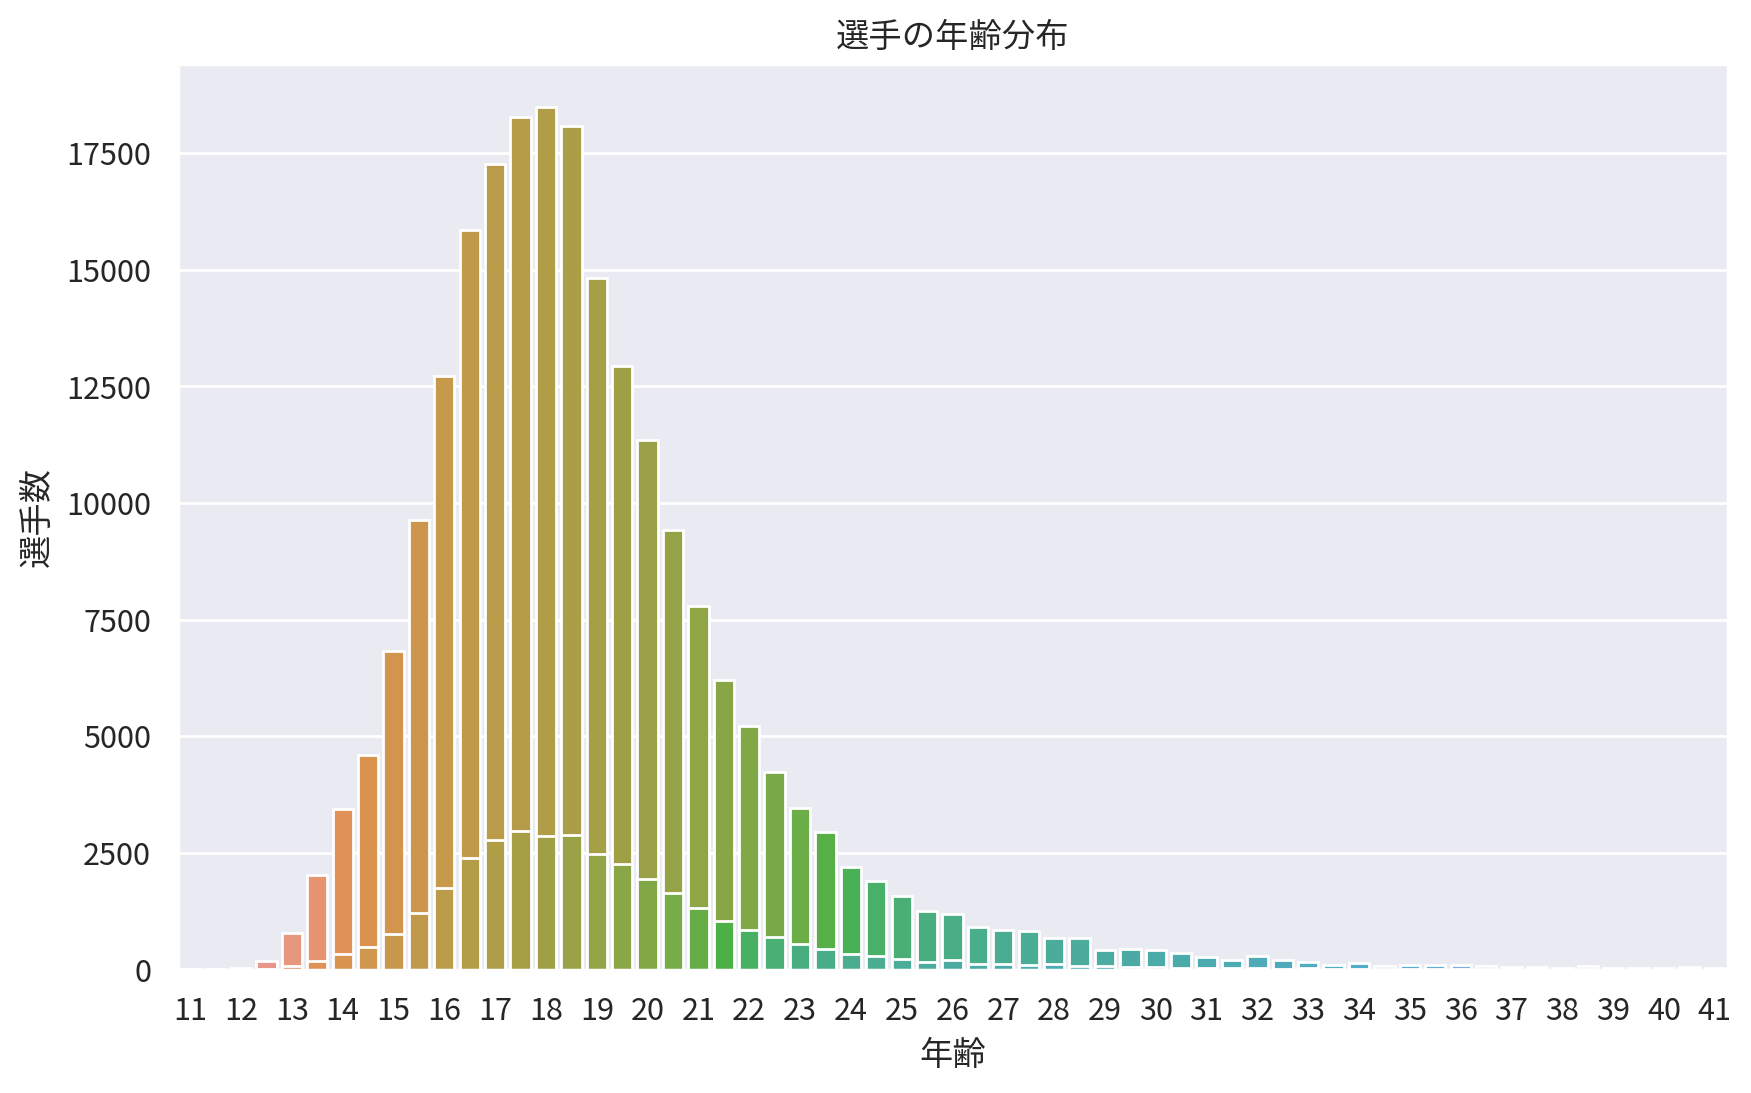

In [806]:
sub_df['Age'] = sub_df['Age'].astype(int)
fig , ax = plt.subplots(figsize=(10,6),dpi=200)
ax = sns.countplot(sub_df.loc[:,'Age'])
ax2 = sns.countplot(sub_df.query('MedalSum > 0')['Age'])

ax.set_title('選手の年齢分布')
ax.set_xlabel('年齢')
ax.set_ylabel('選手数')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

plt.show()

In [819]:
print('参加者全員の年齢:\n',)
print(sub_df.loc[:,'Age'].describe())
print("-"*30)
print('メダリストの年齢:\n',)
print(sub_df.query('MedalSum > 0')['Age'].describe())

参加者全員の年齢:

count    222552.000000
mean         25.730701
std           6.676482
min          10.000000
25%          21.000000
50%          25.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64
------------------------------
メダリストの年齢:

count    34088.000000
mean        25.931589
std          6.056468
min         10.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         73.000000
Name: Age, dtype: float64


### INSIGHT

- 参加者もメダリストも、共に平均年齢は25歳です
- 分布を見ると18歳前後が最多です
- 参加者の最年長が97歳!?
- 70歳オーバーのメダリスト!?
- 10歳のメダリスト!?

### 6-3-2 中年男性や中年女性でも獲得できるメダルはありますか？



In [827]:
#　夏季五輪のメダリストリスト
medalist_df = sub_df[sub_df['MedalSum'] > 0].copy()

In [837]:
medalist_df_40 = medalist_df[medalist_df["Age"]>40]

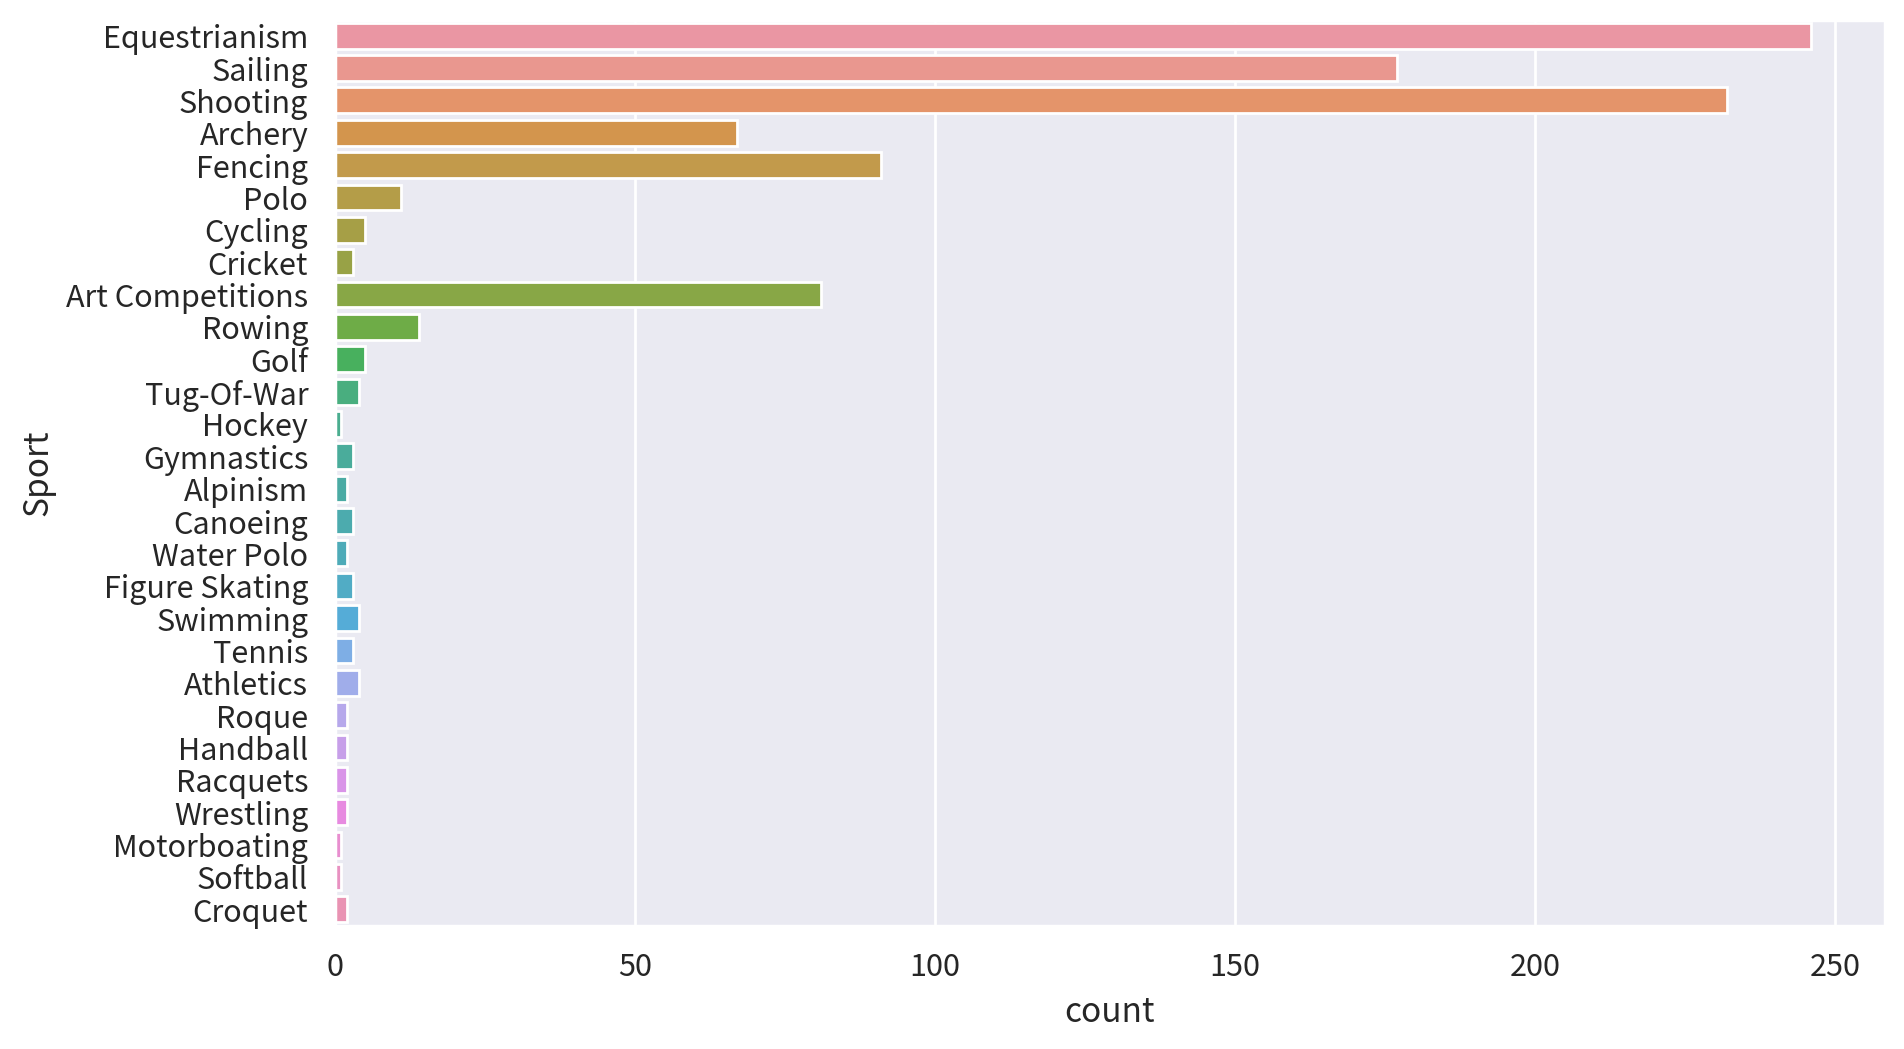

In [853]:
fig , ax = plt.subplots(figsize=(10,6),dpi=200)
ax = sns.countplot(y='Sport',data=medalist_df_40,orient='v')


,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,No Medal,Silver,MedalSum
1755,974,Nils August Domingo Adlercreutz,M,45,181.009709,72.213592,SWE,1912 Summer,1912,Summer,Stockholm,Equestrianism,"Equestrianism Men's Three-Day Event, Team",Gold,Sweden,0,1,0,0,1
2062,1144,Henrik Agersborg,M,47,181.214876,81.000000,NOR,1920 Summer,1920,Summer,Antwerpen,Sailing,Sailing Mixed 6 metres,Bronze,Norway,1,0,0,0,1
2429,1356,Christian Ahlmann,M,41,189.000000,80.000000,GER,2016 Summer,2016,Summer,Rio de Janeiro,Equestrianism,"Equestrianism Mixed Jumping, Team",Bronze,Germany,1,0,0,0,1
3223,1809,Nasser Salih Nasser Abdullah Al-Attiya,M,41,178.000000,82.000000,QAT,2012 Summer,2012,Summer,London,Shooting,Shooting Men's Skeet,Bronze,Qatar,1,0,0,0,1
3304,1858,Fehaid Al-Deehani,M,45,178.000000,95.000000,KUW,2012 Summer,2012,Summer,London,Shooting,Shooting Men's Trap,Bronze,Kuwait,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265263,132751,Jack Butler Yeats,M,52,173.191048,74.461140,IRL,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Painting,Silver,Ireland,0,0,0,1,1
265464,132845,Hubert Yencesse,M,48,170.666667,79.333333,FRA,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",Bronze,France,1,0,0,0,1
266293,133226,Mahonri Mackintosh Young,M,54,178.677419,75.071429,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",Gold,USA,0,1,0,0,1
267813,133986,Jzef Zapdzki,M,43,174.000000,71.000000,POL,1972 Summer,1972,Summer,Munich,Shooting,"Shooting Mixed Rapid-Fire Pistol, 25 metres",Gold,Poland,0,1,0,0,1
